<div style="height: 200px; background-image: url('https://legalserviceindia.com/legal/uploads/offencesagainstchildrenunderipc_2824045185.jpg'); background-size: cover; background-position: center;"></div>

### Per Capita Analysis

- To account for population size differences, we calculate and visualize crime rates per capita. This approach enables us to compare crime intensity on  a more equal footing across regions, offering a clearer picture of how crime rates relate to population size.
- These visualizations are intended to facilitate a deeper understanding of crime distribution and its impact, providing valuable insights for policymakers, researchers, and the public. The following sections will present detailed plots and charts to support our analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
crime_csv = 'cleaned_data.csv'
df_crime = pd.read_csv(crime_csv)

In [11]:
df_crime.head()

,States/UTs,Crime Head,2014
0,Andhra Pradesh,1 - Murder (Section 302 and 303 IPC),45
1,Andhra Pradesh,2 - Infanticide (Section 315 IPC),2
2,Andhra Pradesh,3 - Rape,477
3,Andhra Pradesh,4 - Assault on women with intent to outrage he...,274
4,Andhra Pradesh,5 - Insult to the Modesty of Women (Girls Chil...,75


#### Creating a population Dataframe

In [12]:
df_population = pd.DataFrame({
    'States/UTs': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
                   'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
                  'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
                   'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry'],
    'Population': [49577103, 1383727, 31205576, 104099452, 25545198, 1458545, 60439692, 25351462, 6864602, 12541032, 32988134, 61095297, 33406061,
                   72626809, 112374333, 257090, 2966889, 1097206, 1978502, 41974219, 27743338, 68548437, 610577, 72147030, 35003674, 3673917, 199812341,
                   10086292, 91276115, 380581, 1055450, 292882, 292882, 16787941, 64473, 1247953] 
})

In [5]:
df_population

,States/UTs,Population
0,Andhra Pradesh,49577103
1,Arunachal Pradesh,1383727
2,Assam,31205576
3,Bihar,104099452
4,Chhattisgarh,25545198
5,Goa,1458545
6,Gujarat,60439692
7,Haryana,25351462
8,Himachal Pradesh,6864602
9,Jammu & Kashmir,12541032


## Crimes per capita 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17604\2722120415.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crimes_Per_Capita', y='States/UTs', data=df_merged, palette='coolwarm')


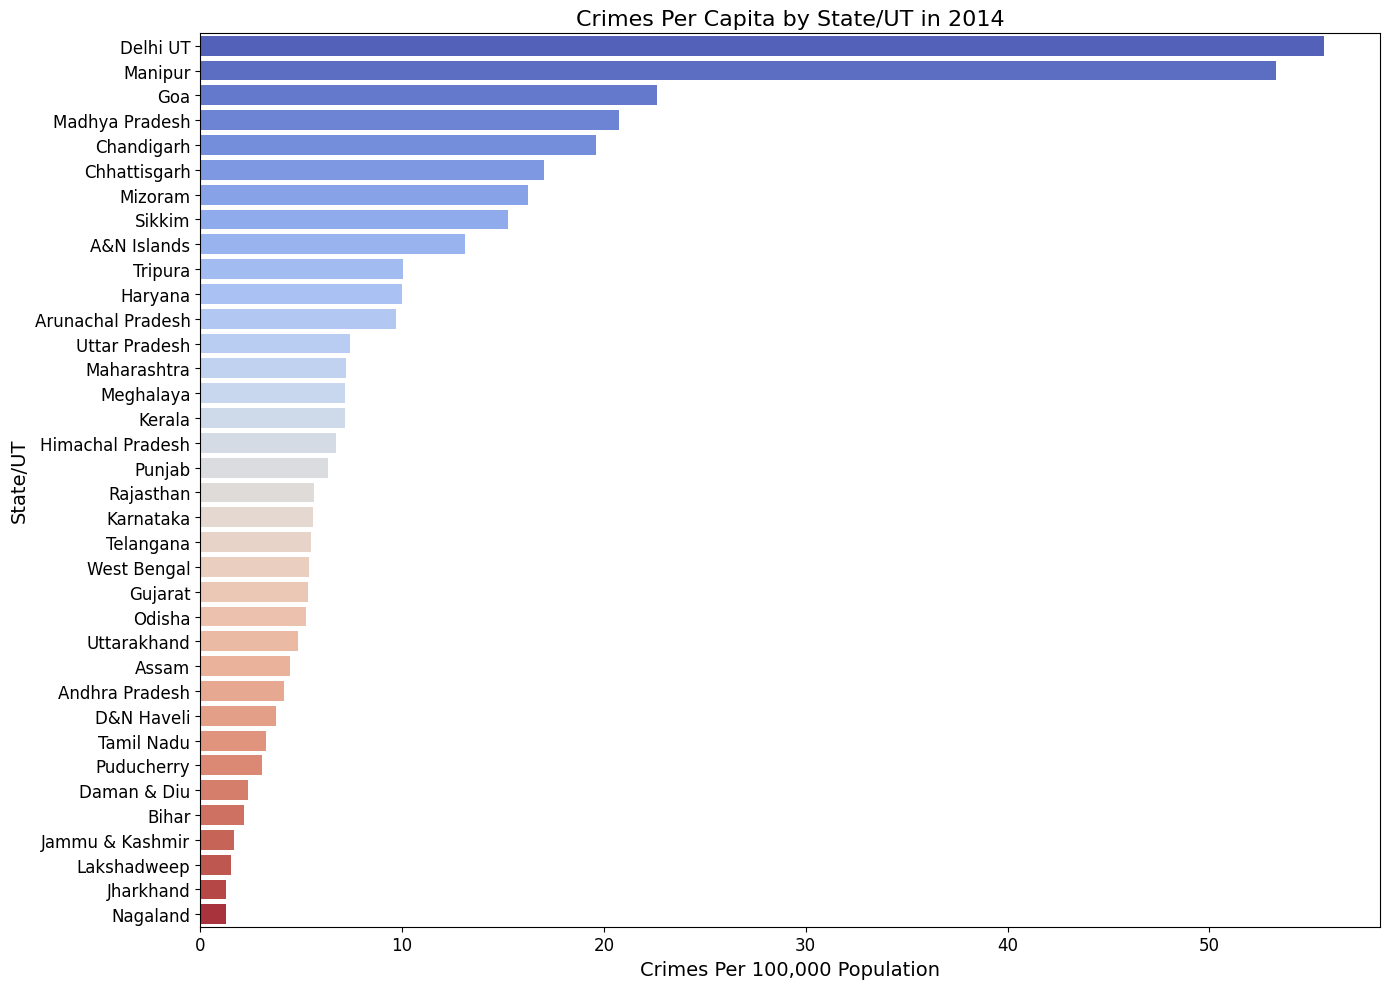

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crime data
df_crime = pd.read_csv('cleaned_data.csv')

# Load the population data
df_population = pd.DataFrame({
    'States/UTs': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
                   'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
                   'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
                   'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry'],
    'Population': [49577103, 1383727, 31205576, 104099452, 25545198, 1458545, 60439692, 25351462, 6864602, 12541032, 32988134, 61095297, 33406061,
                   72626809, 112374333, 257090, 2966889, 1097206, 1978502, 41974219, 27743338, 68548437, 610577, 72147030, 35003674, 3673917, 199812341,
                   10086292, 91276115, 380581, 1055450, 292882, 292882, 16787941, 64473, 1247953]
})

# Aggregate total crimes by state/UT
total_crimes_by_state = df_crime.groupby('States/UTs')['2014'].sum().reset_index()
total_crimes_by_state.rename(columns={'2014': 'Total_Crimes'}, inplace=True)

# Merge with population data
df_merged = pd.merge(total_crimes_by_state, df_population, on='States/UTs')

# Calculate crimes per capita
df_merged['Crimes_Per_Capita'] = df_merged['Total_Crimes'] / df_merged['Population'] * 100000  # Per 100,000 population

# Sort data by crimes per capita in descending order
df_merged = df_merged.sort_values(by='Crimes_Per_Capita', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Crimes_Per_Capita', y='States/UTs', data=df_merged, palette='coolwarm')

# Add labels and title
plt.xlabel('Crimes Per 100,000 Population', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Crimes Per Capita by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


- Delhi has highest crimes per capita against children in 2014
- Nagaland has the fewest crimes per capita
- With Delhi, Manipur also showing high number of crimes reported

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17604\4034823749.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Murders_Per_Capita', y='States/UTs', data=df_merged_murder, palette='rocket')


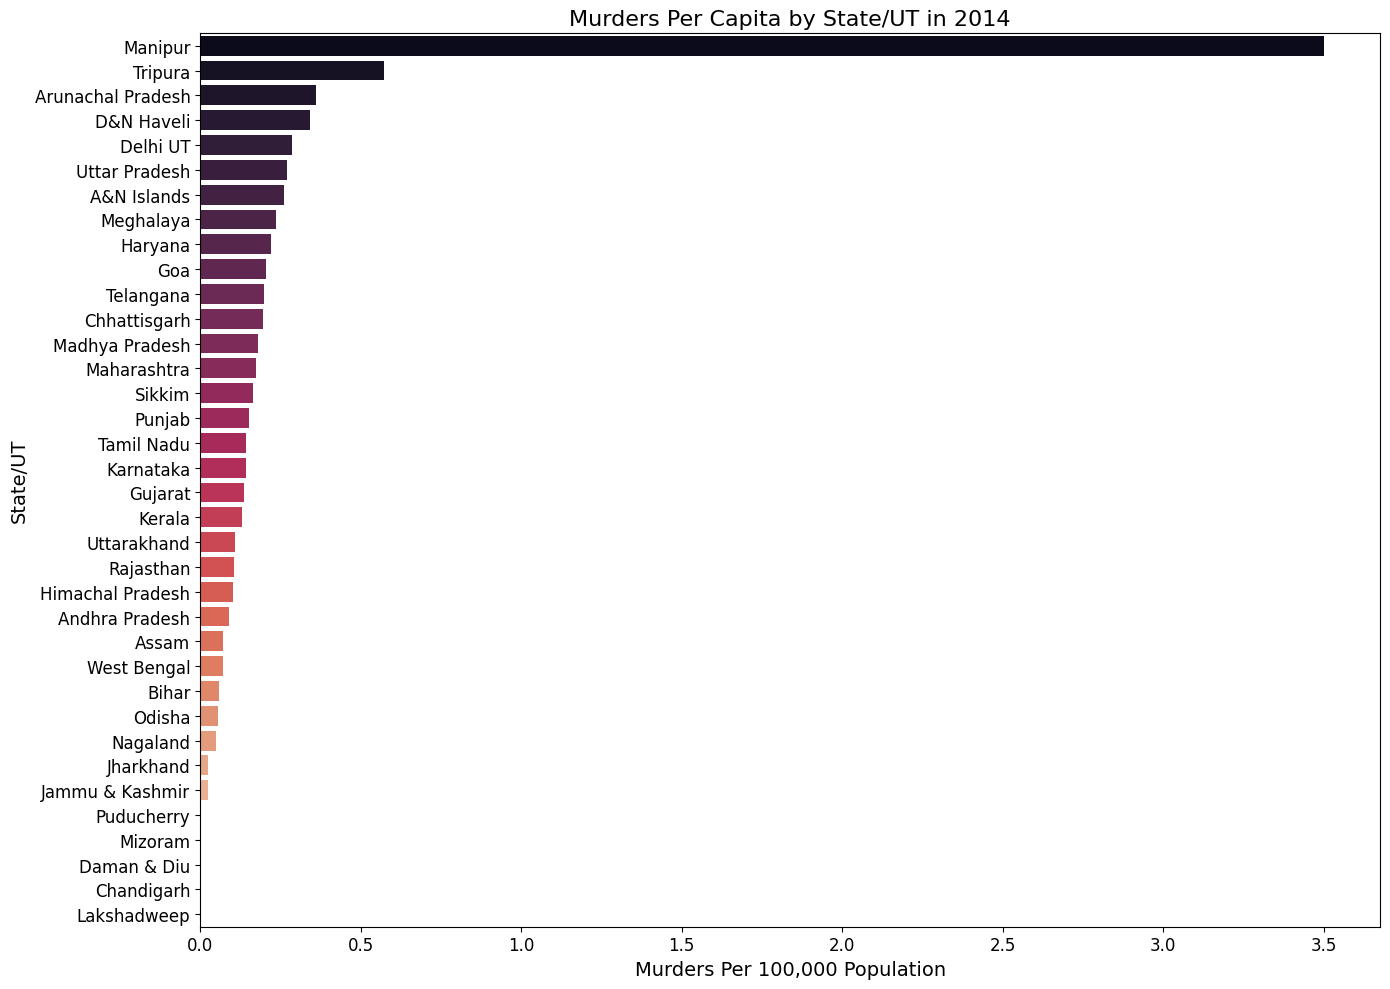

In [17]:
# Filter data for murders
df_murders = df_crime[df_crime['Crime Head'] == '1 - Murder (Section 302 and 303 IPC)']

# Aggregate data to get total number of murders by state
total_murders_by_state = df_murders.groupby('States/UTs')['2014'].sum().reset_index()
total_murders_by_state.rename(columns={'2014': 'Total_Murders'}, inplace=True)

# Merge with population data
df_merged_murder = pd.merge(total_murders_by_state, df_population, on='States/UTs')

# Calculate murders per capita
df_merged_murder['Murders_Per_Capita'] = df_merged_murder['Total_Murders'] / df_merged_murder['Population'] * 100000  # Per 100,000 population

# Sort data by murders per capita in descending order
df_merged_murder = df_merged_murder.sort_values(by='Murders_Per_Capita', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Murders_Per_Capita', y='States/UTs', data=df_merged_murder, palette='rocket')

# Add labels and title
plt.xlabel('Murders Per 100,000 Population', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Murders Per Capita by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Mnipur have a staggering amount of child murder in 2014
- But the statitics range from 0 to 3.5 per 100000. So the statitics showing is a bit exagerated
- Puduchery, mizoram, daman & Diu, Chandigarh and lakshadweep has not reported any child murders in 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17604\1194740433.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Child_Rapes_Per_Capita', y='States/UTs', data=df_merged_child_rape, palette='viridis')


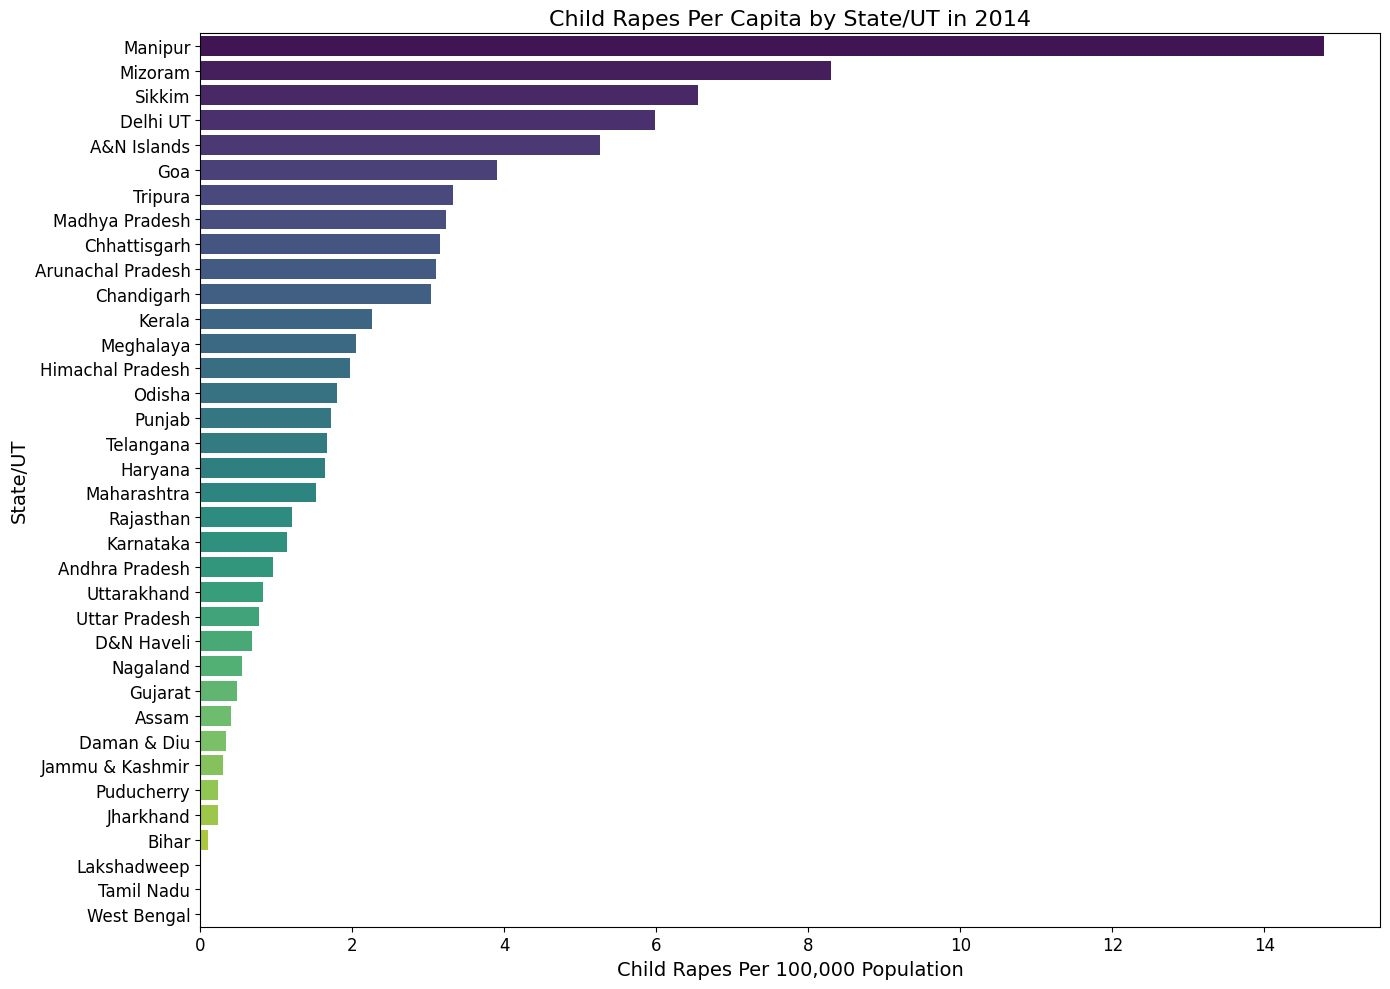

In [19]:
# Filter data for child rapes
# Assuming 'Child Rape' or similar term is used in your dataset for child rapes
df_child_rape = df_crime[df_crime['Crime Head'].str.contains('3 - Rape', case=False, na=False)]

# Aggregate data to get total number of child rapes by state
total_child_rape_by_state = df_child_rape.groupby('States/UTs')['2014'].sum().reset_index()
total_child_rape_by_state.rename(columns={'2014': 'Total_Child_Rapes'}, inplace=True)

# Merge with population data
df_merged_child_rape = pd.merge(total_child_rape_by_state, df_population, on='States/UTs')

# Calculate child rapes per capita
df_merged_child_rape['Child_Rapes_Per_Capita'] = df_merged_child_rape['Total_Child_Rapes'] / df_merged_child_rape['Population'] * 100000  # Per 100,000 population

# Sort data by child rapes per capita in descending order
df_merged_child_rape = df_merged_child_rape.sort_values(by='Child_Rapes_Per_Capita', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Child_Rapes_Per_Capita', y='States/UTs', data=df_merged_child_rape, palette='viridis')

# Add labels and title
plt.xlabel('Child Rapes Per 100,000 Population', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Child Rapes Per Capita by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- In child rape index also manipur has most reported cases in 2014
- lakshadweep, tamil nadu and west bengal does not report child rape cases in 2014

### Child abduction per capita

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17604\2201590623.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Child_Abductions_Per_Capita', y='States/UTs', data=df_merged_child_abduction, palette='magma')


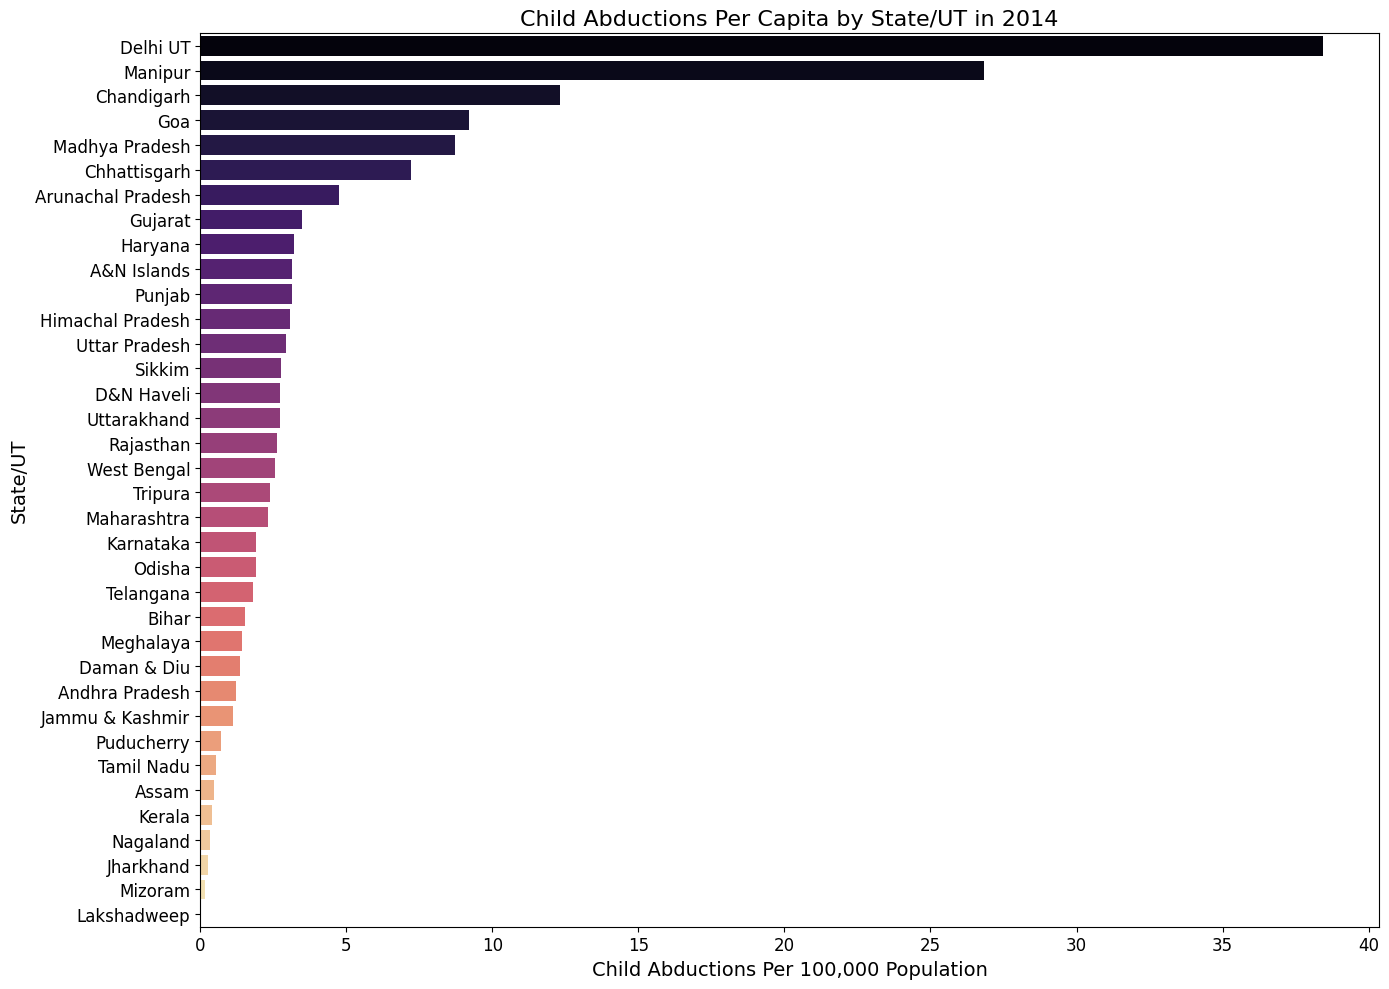

In [25]:
# Filter data for child abductions
# Adjust the exact term used in your dataset for child abductions
df_child_abduction = df_crime[df_crime['Crime Head'].str.contains('Kidnapping & Abduction', case=False, na=False)]

# Aggregate data to get total number of child abductions by state
total_child_abduction_by_state = df_child_abduction.groupby('States/UTs')['2014'].sum().reset_index()
total_child_abduction_by_state.rename(columns={'2014': 'Total_Child_Abductions'}, inplace=True)

# Merge with population data
df_merged_child_abduction = pd.merge(total_child_abduction_by_state, df_population, on='States/UTs')

# Calculate child abductions per capita
df_merged_child_abduction['Child_Abductions_Per_Capita'] = df_merged_child_abduction['Total_Child_Abductions'] / df_merged_child_abduction['Population'] * 100000  # Per 100,000 population

# Sort data by child abductions per capita in descending order
df_merged_child_abduction = df_merged_child_abduction.sort_values(by='Child_Abductions_Per_Capita', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Child_Abductions_Per_Capita', y='States/UTs', data=df_merged_child_abduction, palette='magma')

# Add labels and title
plt.xlabel('Child Abductions Per 100,000 Population', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Child Abductions Per Capita by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Child abducrion is nearly 40 percent of the crimes in india and delhi and manipur reported highest number of cases